# NewsVADERPy: News Mood Analysis

- Trend 1
- Trend 2
- Trend 3

In [1]:
# ----------------------------------------------------------------------
# Step 1: Import necessary modules and environment
# ----------------------------------------------------------------------

# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# This file contains all Twitter-related actions, so no need to import here
import tweetParser as tp

In [2]:
# ----------------------------------------------------------------------
# Step 2: Call API, get tweets, and parse tweets into a dataframe+CSV
# ----------------------------------------------------------------------

# create list of target news organizations' Twitter handles
targetNewsOrg_list = ["BBC","FoxNews","nytimes", "BreitbartNews",
                      "CBSNews","USATODAY"]

# create and set color palette for all charts
orgPalette = sns.color_palette("bright", len(targetNewsOrg_list))
sns.set_palette(orgPalette)

# define number of tweets we want to pull from each org
numTweets = 100

# break into increments of 10
numCycles = int(round(numTweets/10))

# create dict to store dictionaries generated during analysis
completeResults_df = tp.parseTweets(targetNewsOrg_list, numCycles)

# rearrange columns to be more sensible
completeResults_df = completeResults_df[["handle", "count", "compound",
                                         "positive", "negative", "neutral",
                                         "date", "text"]].sort_values('date')
completeResults_df.to_csv("TweetsAnalyzed.csv")

completeResults_df.head()

,handle,count,compound,positive,negative,neutral,date,text
99,BBC,100,0.5859,0.231,0.000,0.769,1.519967e+09,We've been creating and designing for thousand...
98,BBC,99,0.9081,0.383,0.000,0.617,1.519967e+09,RT @simon_schama: After 3 years of work #Civil...
97,BBC,98,0.7712,0.489,0.000,0.511,1.519967e+09,"A greeting from roughly 37,000 years ago. 👋 Am..."
96,BBC,97,0.0000,0.000,0.000,1.000,1.519968e+09,"RT @bbcarts: As #Civilisations, a series 3 yea..."
95,BBC,96,-0.3818,0.000,0.126,0.874,1.519969e+09,High-resolution photographs of this tiny seal ...


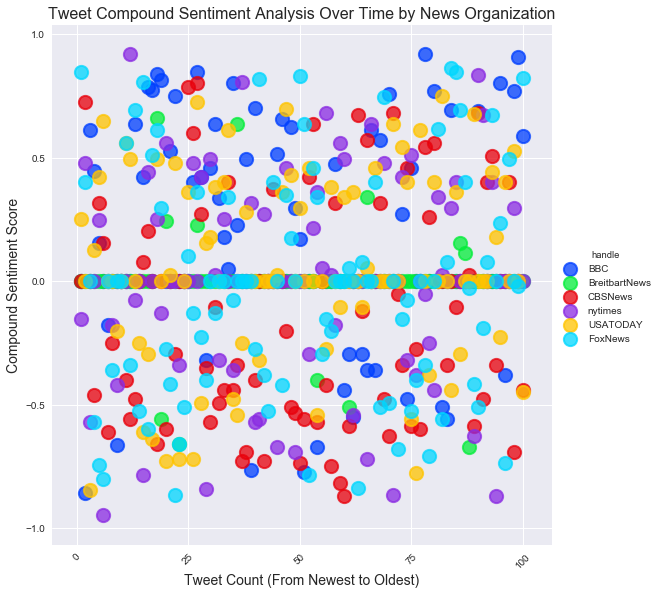

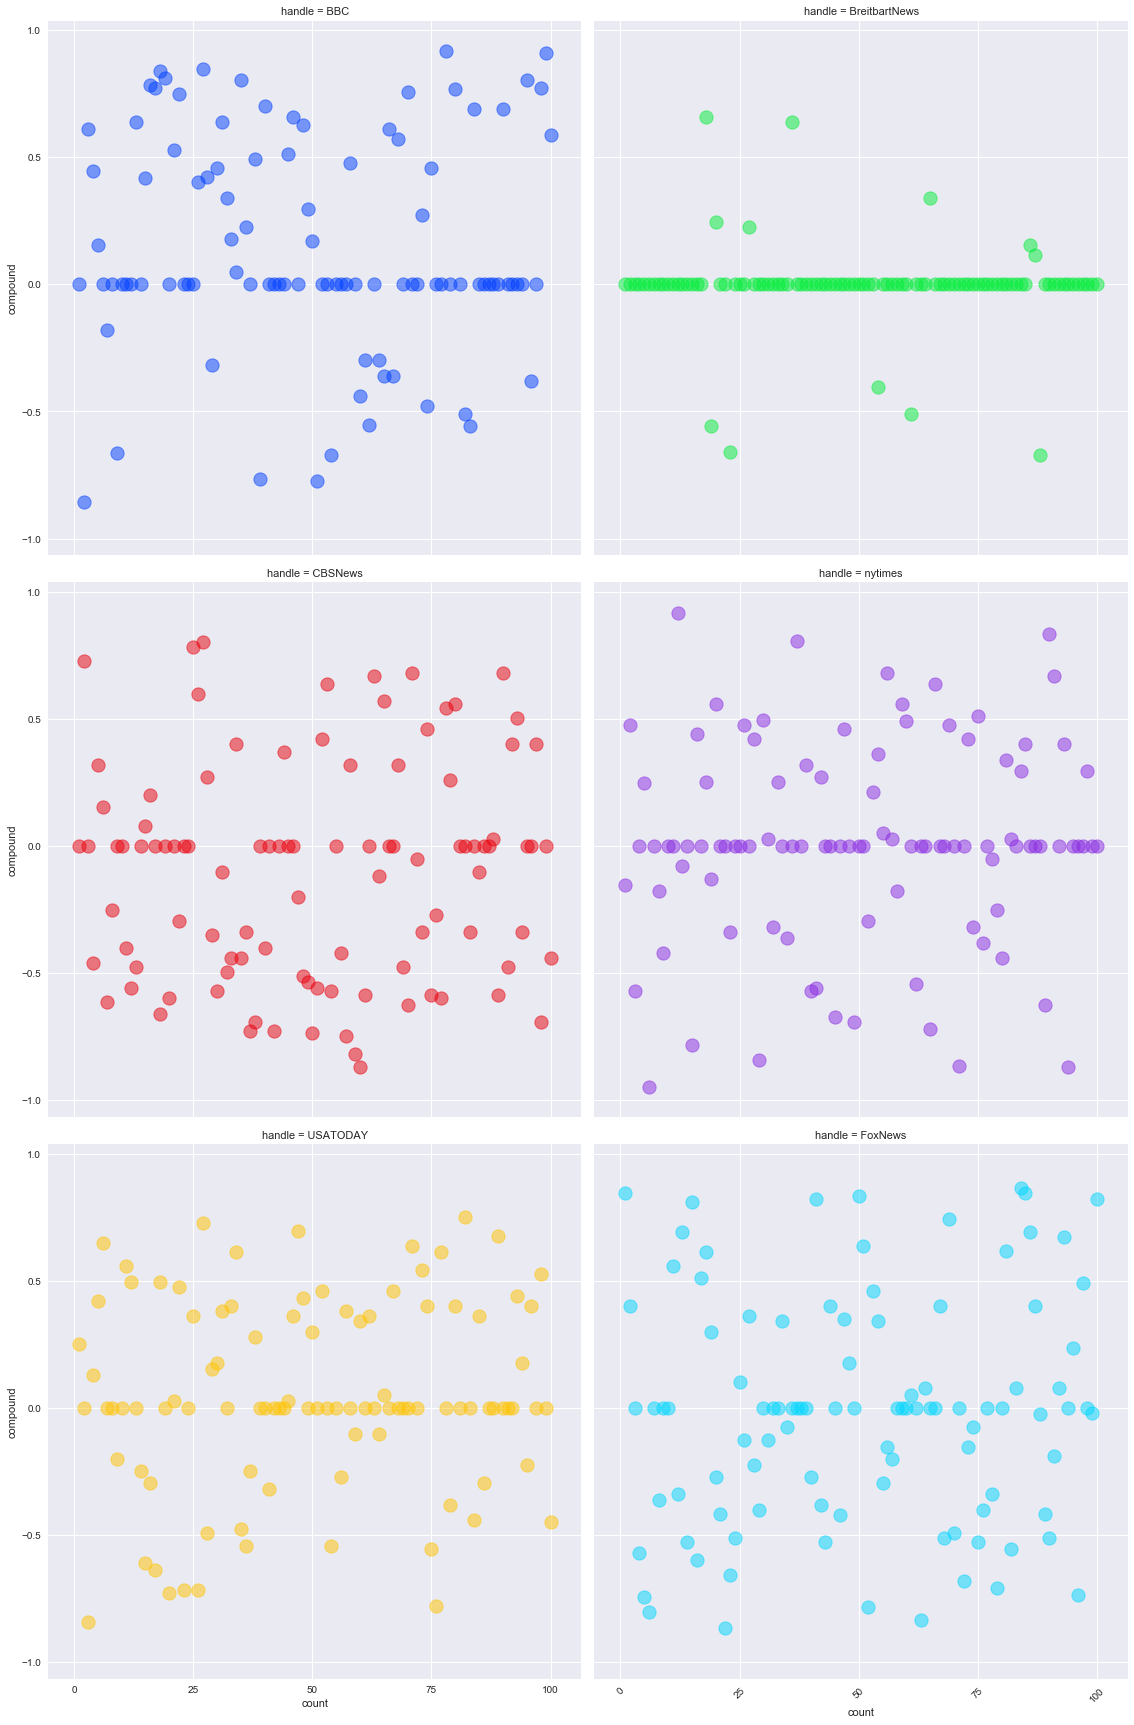

In [30]:
# ----------------------------------------------------------------------
# Step 3: Generate first plot: scatterplot of last 100 tweets showing 
# compound sentiment and sorted by relative timestamp
# ----------------------------------------------------------------------
#set style to be seaborn
sns.set()

# generate overall plot
compoundSentByTime_plot = sns.lmplot(x="count", y="compound", 
                                data=completeResults_df, 
                                palette=orgPalette, hue='handle',
                                fit_reg=False, legend=True, size=8, 
                                scatter_kws={'s':175, 'alpha':0.75,
                                             'edgecolors':'face', 
                                             'linewidths':2})
plt.xlabel("Tweet Count (From Newest to Oldest)",size=14)
plt.ylabel("Compound Sentiment Score", size=14)
plt.title("Tweet Compound Sentiment Analysis Over Time by News Organization", 
          size=16)
plt.locator_params(nbins=5)
plt.xticks(rotation=45)
plt.savefig("CompoundSentimentAnalysis_Scatterplot.png")

#generate subplots
orgPalette = sns.color_palette("bright", len(targetNewsOrg_list))
compoundSentByTime_subplots = sns.lmplot(x="count", y="compound", 
                                data=completeResults_df, 
                                col="handle", col_wrap = 2,
                                palette=orgPalette, hue='handle',
                                fit_reg=False, legend=True, size=8,
                                scatter_kws={'s':175, 'alpha':0.5,
                                             'edgecolors':'face', 
                                             'linewidths':1})
plt.savefig("CompoundSentimentAnalysis_Subplots.png")


plt.locator_params(nbins=5)
plt.xticks(rotation=45)
plt.show(compoundSentByTime_plot)
plt.show(compoundSentByTime_subplots)

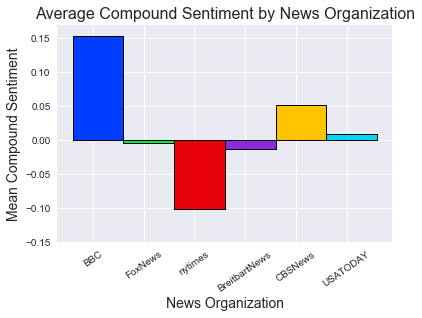

In [29]:
# ----------------------------------------------------------------------
# Step 4: Generate second plot: bar plot showing overall compound 
# sentiment in the last 100 tweets
# ----------------------------------------------------------------------

# generate dataframe
meanCompoundSent_df = pd.DataFrame(completeResults_df.groupby("handle").mean()["compound"])
meanCompoundSent_df.reset_index(level=0, inplace=True)

# generate x + y
x_axis = np.arange(len(targetNewsOrg_list))
y_axis = meanCompoundSent_df["compound"]

# create bar plot
plt.bar(x_axis, y_axis, color=orgPalette, width=1, align='edge', linewidth=1, edgecolor='black')
tick_locations = [value + 0.4 for value in x_axis]
plt.xticks(tick_locations, targetNewsOrg_list, rotation=35)
plt.xlabel('News Organization', size=14)
plt.ylabel('Mean Compound Sentiment', size=14)
plt.ylim(-0.15, 0.17)
plt.title('Average Compound Sentiment by News Organization', size=16)
plt.savefig("avgCompoundSentimentBarchart.png")
plt.show()